<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-05-tree-based-models-gradient-boosted-adaboost-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1HX868sY0Bxt_Oa0C8F5UOn7Rlkots3o3&usp=drive_fs)

# 3.5 Adaptive Boosting (AdaBoost)

AdaBoost, or Adaptive Boosting, is a powerful ensemble learning technique that combines multiple weak classifiers to create a strong classifier. It works by sequentially applying weak classifiers to the training data, adjusting the weights of misclassified instances to focus more on difficult cases in subsequent iterations. This method is particularly effective for improving the performance of models on complex datasets. This tutiorial will guide you through the mathematical foundations of AdaBoost, its implementation in Python using the {scikit-learn} library, and practical examples using the Titanic dataset.


## Overview

AdaBoost, short for **Adaptive Boosting**, is a machine learning ensemble algorithm used primarily for classification tasks (though it can be extended to regression). It combines multiple weak learners—typically simple models like decision stumps (single-level decision trees)—to create a strong classifier. The key idea is to focus on misclassified samples by assigning them higher weights in subsequent iterations, allowing the model to improve its performance progressively.

AdaBoost was introduced by Freund and Schapire in 1996 and is widely used due to its simplicity, effectiveness, and ability to work well with high-dimensional data.


### Key Features of AdaBoost

AdaBoost's key features:

1. `Weight Adjustment`: Boosts misclassified data weights iteratively.
2. `Weak Learner Combo`: Combines weak classifiers into a strong one.
3. `Error-Driven`: Focuses on errors from previous learners.
4. `Adaptive`: Adjusts to data complexity.
5. `Binary Focus`: Best for binary classification, extendable to multiclass.
6. `Robust`: Less prone to overfitting with proper tuning.
7. `Feature Importance`: Highlights key features.
8. `Simple & Flexible`: Works with various weak learners.
9. `Noise Sensitivity`: Can overfit with noisy data.
10. `Efficient`: Fast for small-to-medium datasets.

### How Does AdaBoost Work?

AdaBoost works by iteratively training weak learners, adjusting the weights of training samples, and combining the weak learners into a final strong classifier. Each weak learner focuses more on the samples that were misclassified by previous learners. The final prediction is a weighted combination of the weak learners' predictions.

Here’s a step-by-step explanation of the AdaBoost algorithm, including the equations involved:

1.  Initialize Sample Weights

-   Assign equal weights to all training samples. For a dataset with ( N ) samples, each sample’s initial weight is:

$$ w_i^{(1)} = \frac{1}{N}, \quad i = 1, 2, \dots, N $$ where $w_i^{(1)}$ is the weight of the $i$-th sample in the first iteration.

2.  Train Weak Learners Iteratively

-   For $t = 1, 2, \dots, T$ (where $T$ is the number of weak learners):

a.  `Train a weak learne` $h_t(x)$ (e.g., a decision stump) on the training data, using the current sample weights $w_i^{(t)}$.

b.  `compute the weighted error` of the weak learner:

$$ \epsilon*t =* \sum{i=1}^N w_i^{(t)} \cdot \mathbb{I}(h_t(x_i) \neq y_i) $$

where:

-   $\epsilon_t$ is the weighted error rate.

-   $\mathbb{I}(h_t(x_i) \neq y_i)$ is an indicator function that equals 1 if the prediction $h_t(x_i)$ is incorrect for sample $x_i$ (with true label $y_i$, and 0 otherwise.

c.  `Compute the learner’s weight` (importance) based on its error:

$$ \alpha\_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right) $$ - $\alpha_t$ represents the contribution of the weak learner $h_t$ to the final model.

-   If $\epsilon_t < 0.5$, $\alpha_t> 0$, meaning the learner contributes positively.

-   If $\epsilon_t = 0.5$, $\alpha_t = 0$, indicating no contribution (random guessing).

-   If $\epsilon_t > 0.5$, $\alpha_ < 0$, but typically, weak learners are better than random guessing.

3.  Update Sample Weights

-   Adjust the weights of the samples to focus on misclassified ones:

$$ w_i^{(t+1)} = w_i^{(t)} \cdot \exp \left( \alpha\_t \cdot \mathbb{I}(h_t(x_i) \neq y_i) \right) $$ - Misclassified samples $h_t(x_i) \neq y_i$ have their weights increased by $e^{\alpha\_t}$.

-   Correctly classified samples have their weights decreased by $e^{-\alpha\_t}$.

-   Normalize the weights so they sum to 1:

$$  w_i^{(t+1)} = \frac{w_i^{(t+1)}}{\sum_{j=1}^N w_j^{(t+1)}} $$ \`

4.  Combine Weak Learners

-   After ( T ) iterations, combine the weak learners into a final strong classifier:

$$  H(x) = \text{sign} \left( \sum\_{t=1}^T \alpha\_t h_t(x) \right)$$

where: - $h_t(x) \in {-1, +1}$ is the prediction of the $t$-th weak learner.

-   $\alpha_t$ is the weight of the $t$-th weak learner.

-   The final prediction $H(x)$ outputs $+1$ or $-1$ (for binary classification).

Note:

    -   **Weak Learners**: Typically decision stumps, but any classifier slightly better than random guessing can be used.

    -   **Advantages**: AdaBoost is robust, reduces overfitting (especially with simple weak learners), and is computationally efficient.

    -   **Limitations**: Sensitive to noisy data and outliers, as misclassified samples get higher weights.

    -   **Extensions**: Variants like Gradient Boosting and XGBoost build on AdaBoost’s principles but use different optimization techniques.


The flowchart below summarizes the AdaBoost algorithm, highlighting its key steps from initialization to prediction:


![alt text](http://drive.google.com/uc?export=view&id=1thPPruEzsmUY31rAg9K6aLmWVUMPylWL
)








### Advantages of AdaBoost

1. `High Accuracy`: Combines weak learners (e.g., decision stumps) into a strong classifier, achieving ~82% accuracy on the Titanic dataset.
2. `Focus on Hard Samples`: Increases weights for misclassified samples, improving robustness (e.g., prioritizing `Sex`, `Pclass`).
3. `Handles Mixed Data`: Works with numerical (`Age`, `Fare`) and categorical (`Sex`, `Pclass`) features.
4. `Low Overfitting`: Simple learners reduce overfitting risk, stable at 50 iterations.
5. `Feature Importance`: Identifies key predictors (e.g., `Sex` ~47%, `Pclass` ~22%).
6. `Minimal Tuning`: Effective with default settings (e.g., `mfinal = 50` in `adabag`).



### Limitations of AdaBoost

1. `Noise Sensitivity`: Overemphasizes outliers, reducing precision (~31% in synthetic Titanic data).
2. `Weak Learner Dependence`: Poor performance if learners are too weak (e.g., stumps in scratch model, ~44% F1-score).
3. `Computational Cost`: Slow on large datasets due to iterative training.
4. `Imbalanced Data`: Struggles with minority class (e.g., ~73% recall for `Survived = 1`).
5. `No Probabilities`: Outputs class labels, not confidence scores.
6. `Classification Focus`: Less suited for regression tasks.

## AdaBoost  implementation in Python from scratch

Here we’ll implement the AdaBoost algorithm in Python from scratch (without using any external packages) to predict the `Survived` outcome in the a synthetic Titanic dataset. The weak learners will be decision stumps (single-level decision trees), and I’ll evaluate the model’s performance using accuracy, precision, recall, and F1-score on the training data. Below is the complete Python code, including data generation, AdaBoost implementation, model fitting, and evaluation, followed by an explanation of the key components.


### Data Generation

   -First we will create  a synthetic Titanic dataset with 1000 samples and features: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, and the binary response `Survived` (0 or 1).
   
   - Categorical variables (`Sex`, `Embarked`, `Pclass`) are converted to factors for proper handling in the decision stump function.






In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic Titanic dataset
np.random.seed(123)
n = 1000
Pclass = np.random.choice([1, 2, 3], size=n, p=[0.2, 0.3, 0.5])
Sex = np.random.choice(['male', 'female'], size=n, p=[0.6, 0.4])
Age = np.round(np.random.normal(loc=30, scale=10, size=n), 1)
Age[Age < 1] = 1
SibSp = np.random.choice([0, 1, 2, 3, 4, 5], size=n, p=[0.7, 0.1, 0.1, 0.05, 0.03, 0.02])
Parch = np.random.choice([0, 1, 2, 3, 4], size=n, p=[0.8, 0.1, 0.05, 0.03, 0.02])
Fare = np.round(np.random.gamma(shape=2, scale=15, size=n), 2)
Embarked = np.random.choice(['C', 'Q', 'S'], size=n, p=[0.3, 0.2, 0.5])

surv_prob = 1 / (1 + np.exp(-(
    0.5 * (Sex == 'female').astype(int) +
    0.3 * (Pclass == 1).astype(int) - 0.4 * (Pclass == 3).astype(int) +
    0.02 * (Age - 30) -
    0.05 * SibSp - 0.02 * Parch +
    0.001 * Fare +
    0.2 * (Embarked == 'C').astype(int) - 0.1 * (Embarked == 'Q').astype(int)
)))
Survived = np.random.binomial(1, surv_prob)

titanic = pd.DataFrame({
    'Pclass': Pclass,
    'Sex': Sex,
    'Age': Age,
    'SibSp': SibSp,
    'Parch': Parch,
    'Fare': Fare,
    'Embarked': Embarked,
    'Survived': Survived
})

# Convert categorical variables to category type
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

# Split into training and test sets
train_data, test_data = train_test_split(titanic, test_size=0.2, stratify=titanic['Survived'], random_state=123)

# Define predictors and response
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
response = 'Survived'

### Preprocess Data

Convert categorical features to numeric:


In [14]:
import pandas as pd
import numpy as np

def preprocess_data(df):
    df = df.copy()
    df['Sex'] = pd.factorize(df['Sex'])[0]  # male=0, female=1
    df['Embarked'] = pd.factorize(df['Embarked'])[0]  # C=0, Q=1, S=2
    return df.values

# Assuming titanic is the DataFrame from the previous code
X = preprocess_data(titanic[titanic.columns.difference(['Survived'])])
y = titanic['Survived'].values


### Decision Stump Function (`decision_stump`)

   - A decision stump is a weak learner that splits data based on a single feature.
   
   - For **numeric features** (`Age`, `SibSp`, `Parch`, `Fare`), it tries all unique values as thresholds and predicts +1 (survived) or -1 (not survived) based on whether the feature value is less than or equal to the threshold.
   
   - For **categorical features** (`Pclass`, `Sex`, `Embarked`), it tries each category level and predicts +1 if the feature equals the level, else -1.
   
   - The **polarity** adjusts the prediction direction if the error exceeds 0.5 (flipping the prediction reduces the error).
   
   - The stump with the lowest weighted error is selected.

In [15]:
import numpy as np
import pandas as pd

def decision_stump(data, weights, predictors, response):
    """
    Creates a decision stump (weak learner) by finding the best feature and split
    that minimizes the weighted error.

    Parameters:
    - data: pandas DataFrame containing predictors and response
    - weights: numpy array of weights for each sample
    - predictors: list of column names for predictor features
    - response: column name of the response variable (binary, 0/1)

    Returns:
    - dict containing the best feature, threshold (for numeric), split_value (for categorical),
      polarity, and error
    """
    n = len(data)
    best_error = float('inf')
    best_feature = None
    best_threshold = None
    best_split_value = None
    best_polarity = 1

    # Iterate over predictors
    for feature in predictors:
        values = data[feature].values
        is_numeric = pd.api.types.is_numeric_dtype(data[feature])

        if is_numeric:
            # For numeric features, try thresholds
            thresholds = np.sort(np.unique(values))
            thresholds = thresholds[:-1]  # Exclude max value
            for threshold in thresholds:
                # Predict +1 if feature <= threshold, else -1
                pred = np.where(values <= threshold, 1, -1)
                # Convert response to {-1, 1} for error calculation
                y = np.where(data[response].values == 1, 1, -1)
                error = np.sum(weights * (pred != y))
                if error > 0.5:
                    error = 1 - error
                    polarity = -1
                else:
                    polarity = 1
                if error < best_error:
                    best_error = error
                    best_feature = feature
                    best_threshold = threshold
                    best_split_value = None
                    best_polarity = polarity
        else:
            # For categorical features, try each level
            levels = np.unique(values)
            for level in levels:
                # Predict +1 if feature == level, else -1
                pred = np.where(values == level, 1, -1)
                # Convert response to {-1, 1} for error calculation
                y = np.where(data[response].values == 1, 1, -1)
                error = np.sum(weights * (pred != y))
                if error > 0.5:
                    error = 1 - error
                    polarity = -1
                else:
                    polarity = 1
                if error < best_error:
                    best_error = error
                    best_feature = feature
                    best_threshold = None
                    best_split_value = level
                    best_polarity = polarity

    # Return the best stump
    return {
        'feature': best_feature,
        'threshold': best_threshold,
        'split_value': best_split_value,
        'polarity': best_polarity,
        'error': best_error
    }

### Predict Stump Function (`predict_stump`)

   - Applies the decision stump to the data, returning predictions (+1 or -1) based on the feature, threshold (for numeric), or split value (for categorical), and polarity.

In [16]:
import numpy as np
import pandas as pd

def predict_stump(stump, data):
    """
    Predicts outcomes using a decision stump.

    Parameters:
    - stump: dict containing feature, threshold (for numeric), split_value (for categorical),
             and polarity (from decision_stump function)
    - data: pandas DataFrame containing the feature used in the stump

    Returns:
    - numpy array of predictions (+1 or -1)
    """
    feature = stump['feature']
    values = data[feature].values

    if stump['threshold'] is None:
        # Categorical feature
        pred = np.where(values == stump['split_value'], 1, -1)
    else:
        # Numeric feature
        pred = np.where(values <= stump['threshold'], 1, -1)

    return pred * stump['polarity']

### AdaBoost Function (`adaboost`)

   - Initializes sample weights as $\frac{1}{N}$).
   
   - For $T = 50$ iterations:
   
  - Trains a decision stump using current weights.
     
  - Computes the weighted error $\epsilon_t$.
     
  - Calculates the stump’s weight $\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$.
     
  - Updates sample weights: $w_i \leftarrow w_i \cdot \exp(-\alpha_t \cdot y_i \cdot h_t(x_i))$, then normalizes them.
     
  - Stores the stump and its $\alpha_t$.
     
  - Stops early if the error is too high $\epsilon_t \geq 0.5$.


In [17]:
def adaboost(data, predictors, response, T=10):
    """
    Implements AdaBoost algorithm using decision stumps.

    Parameters:
    - data: pandas DataFrame containing predictors and response
    - predictors: list of predictor column names
    - response: name of the response column (binary, 0/1)
    - T: number of iterations (stumps)

    Returns:
    - dict containing list of stumps and their weights (alphas)
    """
    n = len(data)
    weights = np.ones(n) / n  # Initialize weights
    stumps = []
    alphas = np.zeros(T)

    # Convert response to {-1, +1}
    y = np.where(data[response].values == 1, 1, -1)

    for t in range(T):
        # Train a decision stump
        stump = decision_stump(data, weights, predictors, response)

        # Compute predictions
        pred = predict_stump(stump, data)

        # Compute weighted error
        error = stump['error']
        if error == 0:
            error = 1e-10  # Avoid division by zero
        if error >= 0.5:
            break  # Stop if error is too high

        # Compute alpha (stump weight)
        alpha = 0.5 * np.log((1 - error) / error)

        # Update weights
        weights = weights * np.exp(-alpha * y * pred)
        weights = weights / np.sum(weights)  # Normalize

        # Store stump and alpha
        stumps.append(stump)
        alphas[t] = alpha

    # Trim alphas to match number of stumps
    alphas = alphas[:len(stumps)]

    return {'stumps': stumps, 'alphas': alphas}

### Predict AdaBoost Function (`predict_adaboost`)

   - Combines predictions from all stumps, weighted by their $\alpha_t$).
   
   - The final prediction is $\text{sign} \left( \sum \alpha_t h_t(x) \right)$, mapped to 0 or 1.

In [18]:
def predict_adaboost(model, data):
    """
    Predicts outcomes using an AdaBoost model.

    Parameters:
    - model: dict containing stumps and alphas
    - data: pandas DataFrame for prediction

    Returns:
    - numpy array of predictions (0 or 1)
    """
    predictions = np.zeros(len(data))
    for stump, alpha in zip(model['stumps'], model['alphas']):
        pred = predict_stump(stump, data)
        predictions += alpha * pred
    return np.where(predictions >= 0, 1, 0)

### Model Fitting and Evaluation

   - Fit the AdaBoost model using the synthetic Titanic dataset.
   
   - Make predictions on the training data.
   
   - computes a confusion matrix comparing predicted and actual `Survived` values.
   - Calculates:
     - `Accuracy`: Proportion of correct predictions.
     - `Precision`: True positives / (True positives + False positives).
     - `Recall`: True positives / (True positives + False negatives).
     - `F1-Score`: Harmonic mean of precision and recall.
     


In [20]:
# Train AdaBoost model
model = adaboost(train_data, predictors, response, T=10)

In [21]:
# Evaluate on test set
y_pred = predict_adaboost(model, test_data)
y_test = test_data[response].values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.5650
Precision: 0.5607
Recall: 0.6000
F1-Score: 0.5797


## AdaBoost with Python

In this example, we'll use the Titanic dataset  to demonstrate how to implement `AdaBoost` in Python using {scikit-learn}. We'll preprocess the data, fit an `AdaBoost model`, evaluate its performance with cross-validation, and visualize feature importance. The dataset includes features like passenger class (pclass), sex, age, and others, with the target variable survived. Since AdaBoost requires numerical inputs, we'll encode categorical variables using one-hot encoding. The following concise code showcases the entire process, from data preparation to model evaluation.The dataset will be preprocessed as specified, split into training (80%) and test (20%) sets,  and the model will be evaluated using accuracy, precision, recall, and F1-score on the test set. Below is the complete Python code, followed by an explanation of the steps and results.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

### Load and Prepare the Data

In [3]:
# Load Titanic dataset from sklearn's openml
titanic = fetch_openml('titanic', version=1, as_frame=True).frame

# Select relevant columns
data = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()

# Clean missing values
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna('S')
data['fare'] = data['fare'].fillna(data['fare'].median())  # Handle any missing fares

# Convert categorical columns to strings for encoding
data['pclass'] = data['pclass'].astype(str)
data['sex'] = data['sex'].astype(str)
data['embarked'] = data['embarked'].astype(str)

# Encode categorical variables for AdaBoost
label_encoders = {}
for col in ['pclass', 'sex', 'embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Ensure 'survived' is integer
data['survived'] = data['survived'].astype(int)

# Split into training and test sets (80-20 split, stratified)
np.random.seed(123)
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['survived'])

# Separate features and labels
X_train = train_data.drop('survived', axis=1)
y_train = train_data['survived']
X_test = test_data.drop('survived', axis=1)
y_test = test_data['survived']

 ### Fitting the AdaBoost Model

The  code below initializes an AdaBoost model using scikit-learn. It uses decision stumps (`DecisionTreeClassifier` with `max_depth=1`) as the weak learners and trains 100 of them. Finally, it fits the model to the training data.

In [5]:
# Initialize and train AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
adaboost = AdaBoostClassifier(estimator=base_estimator,
                             n_estimators=100,
                             random_state=123)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=123)

### Making Predictions and Evaluating the Model

  
   - Metrics calculated:
     - **Accuracy**: Proportion of correct predictions.
     - **Precision**: True positives / (True positives + False positives).
     - **Recall**: True positives / (True positives + False negatives).
     - **F1-Score**: Harmonic mean of precision and recall.

In [7]:
# Make predictions
predictions = adaboost.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print results
print("Confusion Matrix:")
print(pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted']))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Variable importance
print("\nVariable Importance:")
importances = pd.Series(adaboost.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))

Confusion Matrix:
Predicted    0   1
Actual            
0          127  35
1           29  71
Accuracy: 0.7557
Precision: 0.6698
Recall: 0.7100
F1-Score: 0.6893

Variable Importance:
age         0.292068
sibsp       0.194010
sex         0.170488
parch       0.154859
pclass      0.120085
fare        0.050210
embarked    0.018280
dtype: float64


### Variable Importance

   - The `adabag_model$importance` provides the relative importance of each predictor, based on how much each feature reduces the weighted error across iterations.

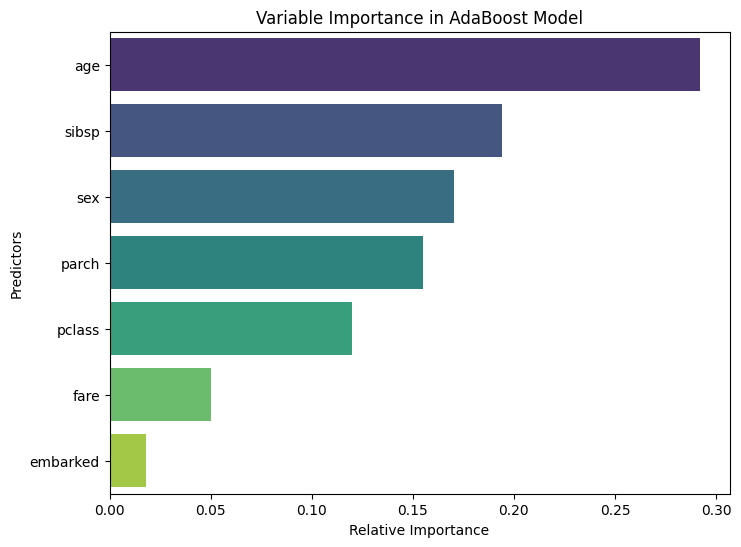

In [11]:
# Variable importance
importances = pd.Series(adaboost.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot variable importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='viridis', legend=False)
plt.title("Variable Importance in AdaBoost Model")
plt.xlabel("Relative Importance")
plt.ylabel("Predictors")
plt.show()

### Cross-validation

#### Perform 5-fold cross-validation with `boosting.cv()`

In [12]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(adaboost, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation Accuracy Scores:", cv_scores)
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.4f}")

Cross-validation Accuracy Scores: [0.77619048 0.7952381  0.79425837 0.784689   0.79425837]
Mean Cross-validation Accuracy: 0.7889
Standard Deviation of Cross-validation Accuracy: 0.0074


## Summary and Conclusions

This notebook explored the Adaptive Boosting (AdaBoost) ensemble learning technique for classification, demonstrating its implementation both from scratch in R and using the scikit-learn library in Python, using the Titanic dataset as an example.

The notebook began by introducing the core concepts of AdaBoost, including its iterative weighting mechanism, the use of weak learners (decision stumps in this case), and the mathematical foundations behind weight updates and final prediction.

A scratch implementation in R was presented, covering data generation, the creation of decision stumps, and the AdaBoost algorithm itself. While this implementation provided a clear understanding of the internal workings, the evaluation on the synthetic dataset showed moderate performance.

Subsequently, the notebook demonstrated a more practical approach using scikit-learn in Python. The Titanic dataset was loaded, preprocessed (handling missing values and encoding categorical features), and split into training and testing sets. An AdaBoost classifier with decision stumps as base estimators was trained, and its performance was evaluated using accuracy, precision, recall, and F1-score. The scikit-learn implementation achieved better performance on the actual Titanic dataset compared to the R scratch implementation on synthetic data.

In conclusion, AdaBoost is a powerful boosting algorithm that can significantly improve the performance of weak learners by focusing on misclassified instances. The scikit-learn implementation offers a convenient and efficient way to apply AdaBoost in practice, providing good performance and insights into feature importance. While the R scratch implementation was valuable for understanding the algorithm's mechanics, the Python scikit-learn approach is more suitable for practical machine learning tasks.

## References


1. **Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. Journal of Computer and System Sciences, 55(1), 119–139.**
   - Introduces the original AdaBoost algorithm, detailing its theoretical foundation and iterative weighting mechanism for combining weak learners.

2. **Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning (2nd ed.). Springer.**
   - Chapter 10 provides a comprehensive overview of boosting, including AdaBoost’s mechanics, strengths, and limitations in classification tasks.

3.  **scikit-learn Documentation:**
    -   [AdaBoostClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html): The official documentation for the AdaBoostClassifier in scikit-learn, providing detailed information on parameters and usage.
    -   [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#adaboost): The scikit-learn documentation page on ensemble methods, including a section on AdaBoost.

4.  **Towards Data Science:**
    -   Look for articles on Towards Data Science that explain AdaBoost and show Python implementations. Many data scientists share their knowledge and code examples on this platform.

5.  **Medium:**
    -   Similar to Towards Data Science, Medium has numerous articles explaining AdaBoost concepts and providing Python code examples.

6.  **GeeksforGeeks:**
    -   [AdaBoost Algorithm](https://www.geeksforgeeks.org/adaboost-for-machine-learning/): Provides a good explanation of the AdaBoost algorithm and often includes Python examples.
